In [22]:
from jax import numpy as np
from jax import random

In [23]:
key = random.PRNGKey(0)

Generate a mixture of Gaussians

In [24]:
key+=1


# define mean and variances of two Gaussians
m1 = -5.0; s1 = 1.5
m2 = 2.0; s2 = 1.1
m3 = 3.0; s3 = 0.6
m4 = 7.0; s4 = 1.7
m5 = 9.0; s5 = 1.4
m6 = 15; s6 = 0.9
m7 = 18; s7 = 1.4
m8 = 23; s7 = 0.5

# Define weights
w1 = 3
w2 = 4
w3 = 2
w4 = 6
w5 = 3
w6 = 4
w7 = 3
w8 = 2
norm = w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8
w1, w2, w3, w4, w5, w6, w7, w8 = w1/norm, w2/norm, w3/norm, w4/norm, w5/norm, w6/norm, w7/norm, w8/norm

In [25]:
# number of samples
n_samples = 100000

In [26]:
# Generate some sample data, with proportions given by w1, w2, w3, ...
Effect = np.concatenate([m1 + s1*random.normal(key, (int(w1*n_samples),)), 
                         m2 + s2*random.normal(key, (int(w2*n_samples),)),
                         m3 + s3*random.normal(key, (int(w3*n_samples),)),
                         m4 + s4*random.normal(key, (int(w4*n_samples),)),
                         m5 + s5*random.normal(key, (int(w5*n_samples),)),
                         m6 + s6*random.normal(key, (int(w6*n_samples),)),
                         m7 + s7*random.normal(key, (int(w7*n_samples),))                         
                        ]
                         )

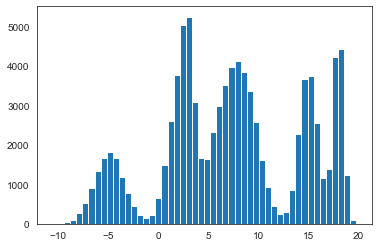

In [27]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(Effect, bins=50)
plt.show()

In [28]:
Effect.shape

(92590,)

In [29]:
# Sort the values and normalize them between 0 and 1

In [30]:
np.min(Effect)

DeviceArray(-10.653173, dtype=float32)

In [31]:
np.max(Effect)

DeviceArray(19.820847, dtype=float32)

In [32]:
Effect = np.sort(Effect)
Effect-=np.min(Effect)
Effect/=np.max(Effect)

In [33]:
print(np.min(Effect))
print(np.max(Effect))

0.0
1.0


In [34]:
# Compute the empirical CDF

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF

In [36]:
ecdf = ECDF(Effect)

In [37]:
Cause = ecdf(Effect)


Make x-y plot, also showing the densities.

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

In [38]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fixing random state for reproducibility
# np.random.seed(19680801)

# Cause in the x-axis, Effect in the y-axis
x = Cause
y = Effect

# Add Kernel Density Estimation for smoother densities on x and y
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)

xx = np.linspace(0, 1, 1000)

In [39]:
import seaborn as sns
sns.set_style("white")
# sns.axes_style("ticks")
# sns.axes_style("whitegrid")

In [40]:
import os

In [41]:
figure_path = "/Users/luigigresele/Documents/Plots_IMA"

In [42]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, Locator, FixedLocator

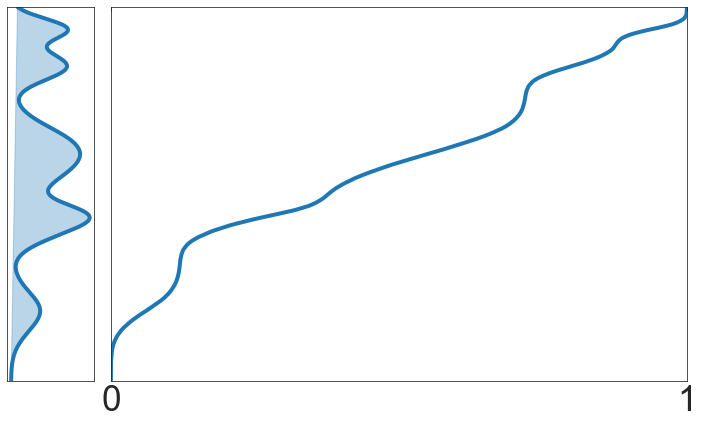

In [91]:
# definitions for the axes
left = 0.4
bottom = 0.4

# Width and height of the x-y plot
width, height = 1.0, 0.65

# Spacing between the axes of the x-y plot and the histograms:
spacing = 0.03


rect_scatter = [left, bottom, width, height]

# Distance from axes
distance = 0.15

rect_histy = [left - distance - spacing, bottom, 0.15, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

with sns.axes_style("white"):
    ax_scatter = plt.axes(rect_scatter)
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax_scatter.spines['left'].set_position('zero')
    ax_scatter.spines['bottom'].set_position('zero')
    ax_scatter.yaxis.set_ticks([])
    ax_scatter.xaxis.set_major_locator(FixedLocator([0.0, 1.0]))

ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=35)
# ax_histx = plt.axes(rect_histx)
# ax_histx.tick_params(direction='in', labelbottom=False)
with sns.axes_style("white"):
    ax_histy = plt.axes(rect_histy)
    ax_histy.xaxis.set_ticks([])

# ax_histy.yaxis.grid(True) # Hide the horizontal gridlines
# ax_histy.xaxis.grid(False) # Show the vertical gridlines

ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
# ax_scatter.scatter(x, y)
with sns.axes_style("white"):
    ax_scatter.plot(x, y, linewidth=4)

# now determine nice limits by hand:
binwidth = 0.01
lim = 1
ax_scatter.set_xlim((0, 1))
ax_scatter.set_ylim((0, 1))

bins = np.arange(0, 1+binwidth, binwidth)

# Add KDE plot of the density for y
ax_histy.plot(kde_y(xx), xx, color='C0', linewidth=4)
ax_histy.fill(kde_y(xx),
            xx,
#               np.ones(xx.shape),
              color='C0', alpha=0.3)

# ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.savefig(os.path.join(figure_path, 'IGCI_plot.png'), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=True, bbox_inches='tight', pad_inches=0.1, metadata=None)

plt.savefig(os.path.join(figure_path, 'IGCI_plot.pdf'), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=True, bbox_inches='tight', pad_inches=0.1, metadata=None)

plt.show()

In [44]:
#Would it be possible to just fill the area under the marginals, or does it have to be a histogram?

#And I think we could also consider leaving out the marginal over x since (a) it currently doesn't look great, and (b) it is not informative and we can simply write that it's uniform (everyone can picture that) in the caption. Benefit would be that the size matches the rest of the figure better.

#Other minor suggestions:

#I think you can use fewer axis ticks, (0, 1) on each axis should suffice, though the scale of the y-axis does not really matter.
#if you export the figure as pdf instead of png the quality will be better and arxiv won't complain in the future